In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, ward

In [673]:
data = "ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse"
values = data.split('\t')

print(values)

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [674]:
df = pd.read_csv('customer_analysis.csv', sep='\t')

display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [675]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [676]:
df = pd.read_csv('customer_analysis.csv', sep='\t')
df = df.dropna()
missing_values = df.isna().sum()
dataset_info = df.info()
display(df)
print(missing_values)
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
None


In [677]:
current_year = 2023
df['Age'] = current_year - df['Year_Birth']

print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  04-09-2012       58       635  ...             0   

In [678]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).apply(lambda date: float(date.timestamp()))

current_time = datetime.now()
df['Age'] = current_time.year - pd.to_datetime(df['Dt_Customer'], unit='s').dt.year

print(df)


         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  1.333930e+09       58       635  ...             

/var/folders/gg/_npm1snd6_71mn1w6clr8rlm0000gp/T/ipykernel_37993/3730684203.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).apply(lambda date: float(date.timestamp()))


In [679]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   float64
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [680]:
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0            0  1.333930e+09       58       635  ...             

In [681]:
df['Living_With'] = df['Marital_Status'].str.split(' - ').str[1]
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  \
0            0  1.333930e+09       58       635  ...             

In [682]:
df['Children'] = df['Kidhome'] + df['Teenhome']
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  1.333930e+09       58       635  ...             

In [683]:
df['Family_Size'] = df['Children'] + 2
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
0            0  1.333930e+09       58       635  ...   

In [684]:
df['Is_Parent'] = (df['Children'] > 0).astype(int)
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
0            0  1.333930e+09       58       635  ...  

In [685]:
df['Education'] = df['Education'].map({'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'PhD':4})
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957        3.0         Single  58138.0        0         0   
1      2174        1954        3.0         Single  46344.0        1         1   
2      4141        1965        3.0       Together  71613.0        0         0   
3      6182        1984        3.0       Together  26646.0        1         0   
4      5324        1981        4.0        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967        3.0        Married  61223.0        0         1   
2236   4001        1946        4.0       Together  64014.0        2         1   
2237   7270        1981        3.0       Divorced  56981.0        0         0   
2238   8235        1956        NaN       Together  69245.0        0         1   
2239   9405        1954        4.0        Married  52869.0        1         1   

       Dt_Customer  Recency

In [686]:
df['Marital_Status'] = df['Marital_Status'].map({"Single": 1, "Married": 2, "Together": 3, "Alone": 4, "Absurd": 5, "Divorced": 6, "Widow": 7, "YOLO": 8})
print(df)

         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957        3.0               1  58138.0        0   
1      2174        1954        3.0               1  46344.0        1   
2      4141        1965        3.0               3  71613.0        0   
3      6182        1984        3.0               3  26646.0        1   
4      5324        1981        4.0               2  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967        3.0               2  61223.0        0   
2236   4001        1946        4.0               3  64014.0        2   
2237   7270        1981        3.0               6  56981.0        0   
2238   8235        1956        NaN               3  69245.0        0   
2239   9405        1954        4.0               2  52869.0        1   

      Teenhome   Dt_Customer  Recency  MntWines  ...  Complain  Z_CostContact  \
0            0  1.333930e+09       58       635  ...  

In [687]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data_scaled, columns=df.columns)
print(scaled_df)

            ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0    -0.019809   -0.986443  -0.135487       -1.015482  0.234063 -0.823039   
1    -1.051009   -1.236801  -0.135487       -1.015482 -0.234559  1.039938   
2    -0.445526   -0.318822  -0.135487        0.217564  0.769478 -0.823039   
3     0.182737    1.266777  -0.135487        0.217564 -1.017239  1.039938   
4    -0.081373    1.016420   1.314143       -0.398959  0.240221  1.039938   
...        ...         ...        ...             ...       ...       ...   
2211  1.625801   -0.151917  -0.135487       -0.398959  0.356642 -0.823039   
2212 -0.488620   -1.904422   1.314143        0.217564  0.467539  2.902916   
2213  0.517646    1.016420  -0.135487        2.067132  0.188091 -0.823039   
2214  0.814693   -1.069896        NaN        0.217564  0.675388 -0.823039   
2215  1.174843   -1.236801   1.314143       -0.398959  0.024705  1.039938   

      Teenhome  Dt_Customer   Recency  MntWines  ...  Complain  Z_CostConta

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [688]:
imputer = SimpleImputer(strategy='mean')
data_scaled_imputed = imputer.fit_transform(data_scaled)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled_imputed)

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rae/anaconda3/lib/pyt

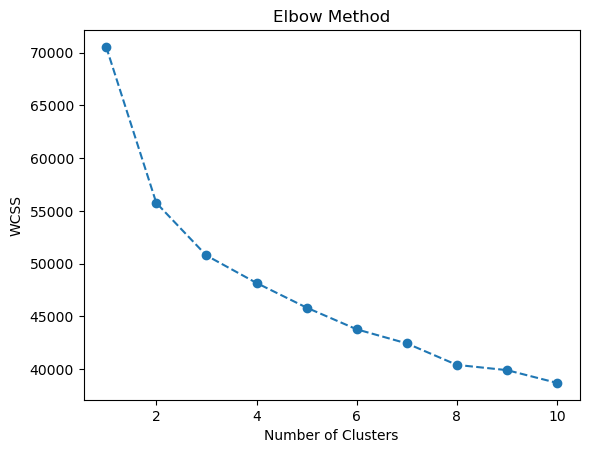

In [689]:
imputer = SimpleImputer(strategy='mean')
data_scaled_imputed = imputer.fit_transform(data_scaled)

wcss = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i)
    cluster.fit(data_scaled_imputed)
    wcss.append(cluster.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

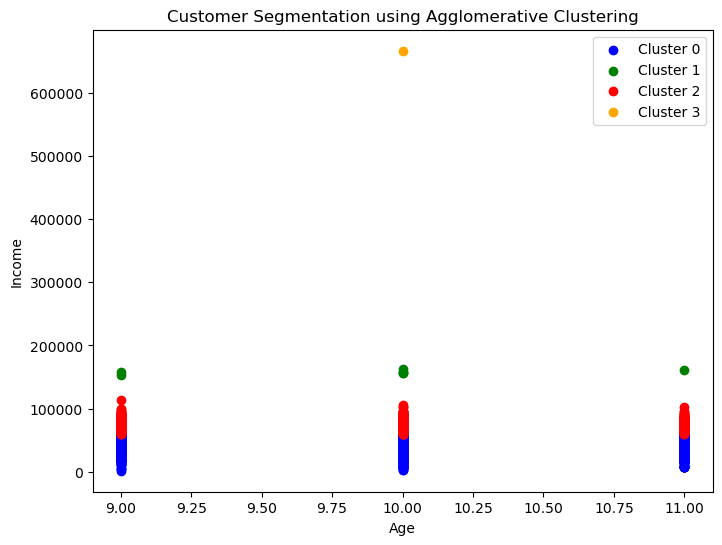

In [690]:
data = pd.read_csv('customer_analysis.csv')

selected_features = df[["Age", "Income"]]

cluster_model = AgglomerativeClustering(n_clusters=4, linkage='complete')
cluster_labels = cluster_model.fit_predict(selected_features)

plt.figure(figsize=(8, 6))
cluster_colors = ['blue', 'green', 'red', 'orange']

for label in set(cluster_labels):
    cluster_data = selected_features[cluster_labels == label]
    plt.scatter(
        cluster_data["Age"],
        cluster_data["Income"],
        c=cluster_colors[label],
        label=f'Cluster {label}'
    )

plt.title('Customer Segmentation using Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

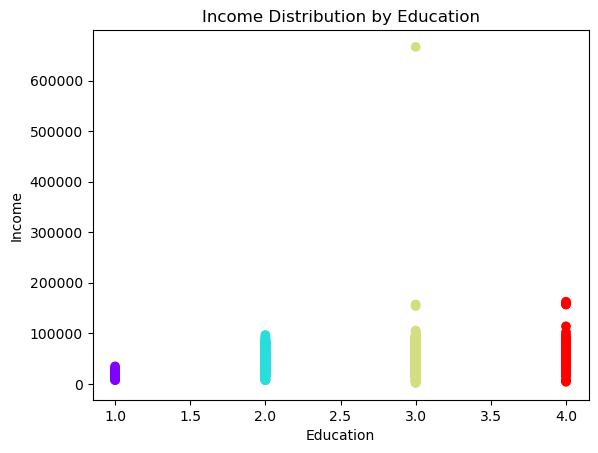

In [691]:
plt.scatter(df['Education'], df['Income'], c=df['Education'], cmap='rainbow')
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Income Distribution by Education')

plt.show()

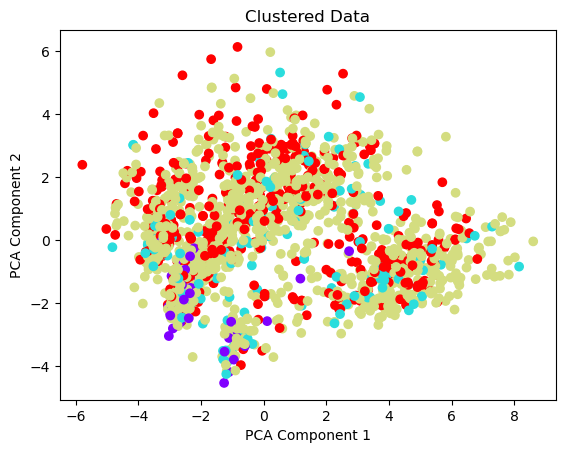

In [692]:
plt.figure()
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Education'], cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustered Data')
plt.show()